# Tugas Besar MK Pembelajaran Mesin
Nama : Imaduddin M. Fadhil 

NIM : 1301184115

Kelas : IF-42-12

In [ ]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Tugas Besar 1 Pembelajaran Mesin/salju_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Tugas Besar 1 Pembelajaran Mesin/salju_train.csv')

In [ ]:
df_combined = pd.concat([df_test, df_train], ignore_index=True)
df_combined.drop(['BersaljuHariIni', 'BersaljuBesok', 'id'], axis=1, inplace=True)

# Data Pre-Processing

EKSPLORASI DATA

cek ulang data dari source data

In [ ]:
df_combined.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0


In [ ]:
df_combined.shape

(127277, 21)

In [ ]:
  df_combined.isnull().sum()

Tanggal                         0
KodeLokasi                      0
SuhuMin                      1287
SuhuMax                      1094
Hujan                        2818
Penguapan                   54880
SinarMatahari               61097
ArahAnginTerkencang          9025
KecepatanAnginTerkencang     8970
ArahAngin9am                 9231
ArahAngin3pm                 3693
KecepatanAngin9am            1551
KecepatanAngin3pm            2657
Kelembaban9am                2332
Kelembaban3pm                3922
Tekanan9am                  13192
Tekanan3pm                  13161
Awan9am                     48886
Awan3pm                     51927
Suhu9am                      1559
Suhu3pm                      3140
dtype: int64

Mengubah Tipe Data Tanggal ke Datetime

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127277 entries, 0 to 127276
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Tanggal                   127277 non-null  object 
 1   KodeLokasi                127277 non-null  object 
 2   SuhuMin                   125990 non-null  float64
 3   SuhuMax                   126183 non-null  float64
 4   Hujan                     124459 non-null  float64
 5   Penguapan                 72397 non-null   float64
 6   SinarMatahari             66180 non-null   float64
 7   ArahAnginTerkencang       118252 non-null  object 
 8   KecepatanAnginTerkencang  118307 non-null  float64
 9   ArahAngin9am              118046 non-null  object 
 10  ArahAngin3pm              123584 non-null  object 
 11  KecepatanAngin9am         125726 non-null  float64
 12  KecepatanAngin3pm         124620 non-null  float64
 13  Kelembaban9am             124945 non-null  f

MENGAMBIL VARIABEL UNTUK CLUSTERING

Melihat Korelasi Antar Variabel untuk memilih atribut yang akan digunakan untuk clustering



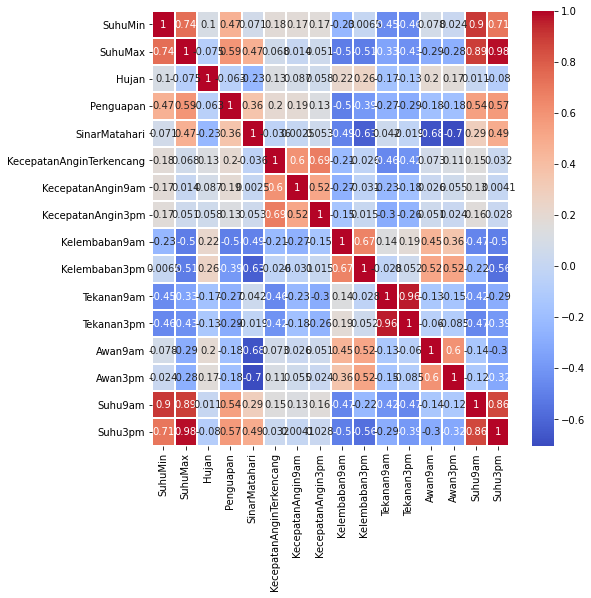

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_combined.corr(),
            cmap='coolwarm',
            annot=True,linewidths=1);

In [ ]:
#Memilih atribut untuk clustering
columns_new = ['Suhu3pm', 'SuhuMax']
df_new = df_combined[columns_new]
df_new.head()

,Suhu3pm,SuhuMax
0,23.6,27.5
1,18.9,19.9
2,26.3,27.2
3,26.4,27.0
4,6.0,7.9


FILLNA

In [ ]:
df_new.isnull().sum()

Suhu3pm    3140
SuhuMax    1094
dtype: int64

Fillna dengan nilai mean

In [ ]:
df_new.fillna(df_new.mean(), inplace=True)
df_new.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Suhu3pm    0
SuhuMax    0
dtype: int64

OUTLIER TREATMENT

Mencari outliers dari df_new dengan menggunakan boxplot

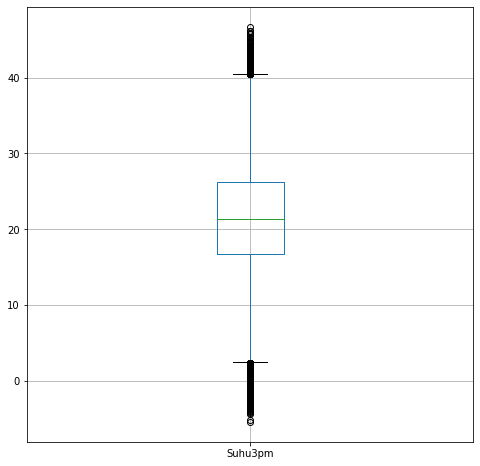

In [ ]:
#Boxplot kolom suhu 3pm
plt.figure(figsize=(8,8))
df_new.boxplot(column='Suhu3pm')

Menghapus Outliers pada Atribut Suhu3pm menggunkan IQR

In [ ]:
#Mencari Lower Whisker dan Upper Whisker
Q1_3pm = df_new['Suhu3pm'].quantile(0.25)
Q3_3pm = df_new['Suhu3pm'].quantile(0.75)
IQR_3pm = Q3_3pm-Q1_3pm

Lower_Whisker_3pm = Q1_3pm - 1.5*IQR_3pm
Upper_Whisker_3pm = Q3_3pm + 1.5*IQR_3pm

In [ ]:
#Menghapus nilai outliers
df_new = df_new[(df_new['Suhu3pm'] < Upper_Whisker_3pm) & (df_new['Suhu3pm'] > Lower_Whisker_3pm)]

Menghapus Outliers pada Atribut SuhuMax menggunkan IQR

In [ ]:
#Mencari Lower Whisker dan Upper Whisker
Q1_max = df_new['SuhuMax'].quantile(0.25)
Q3_max = df_new['SuhuMax'].quantile(0.75)
IQR_max = Q3_max-Q1_max

Lower_Whisker_max = Q1_max - 1.5*IQR_max
Upper_Whisker_max = Q3_max + 1.5*IQR_max

In [ ]:
#Menghapus nilai outliers
df_new = df_new[(df_new['SuhuMax'] < Upper_Whisker_max) & (df_new['SuhuMax'] > Lower_Whisker_max)]

FEATURE SCALLING

In [ ]:
mms = MinMaxScaler()
scaler = mms.fit_transform(df_new)
df_scalled = pd.DataFrame(scaler, columns=columns_new)

In [ ]:
df_scalled

,Suhu3pm,SuhuMax
0,0.556728,0.610422
1,0.432718,0.421836
2,0.627968,0.602978
3,0.630607,0.598015
4,0.092348,0.124069
...,...,...
126331,0.517150,0.516129
126332,0.577836,0.553350
126333,0.456464,0.434243
126334,0.704485,0.667494


# Clustering

klustering menggunakan model K-Means dengan data yang telah di scalling

Desain algoritma K-Means

In [ ]:
def kmeans(df, k):
  # Mengambil Centroid Secara Acak
  idx = np.random.choice(len(df), k, replace=False)
  centroid = df[idx, :]

  #Menghitung Jarak antara centroid dengan semua data
  distance = cdist(df, centroid ,'euclidean')

  #Mengambil centroid dengan jarak minimum
  label = np.array([np.argmin(i) for i in distance])

  while True:
    new_centroid = []
    for idx in range(k):
      #Mencari posisi centroid baru dari rata2 jarak
      temp_cent = df[label==idx].mean(axis=0) 
      new_centroid.append(temp_cent)

    #Membandingkan posisi centroid awal dengan yang baru
    if np.all(centroid == new_centroid) : 
      #Apabila sama (tidak ada perubahan) maka perulangan berhenti
      break

    #Jika masih berubah, variabel centroid di update dari new centroid
    centroid = np.vstack(new_centroid)

    #Menhitung jarak antara centroid dengan semua data
    distance = cdist(df, centroid ,'euclidean')

    #Mengambil centroid dengan jarak minimum
    label = np.array([np.argmin(i) for i in distance])
    
  return label, centroid


  

Menjalankan fungsi kmeans

In [ ]:
df = df_scalled.to_numpy()
k = 2
label, final_centroid = kmeans(df, k)

Visualisasi Data

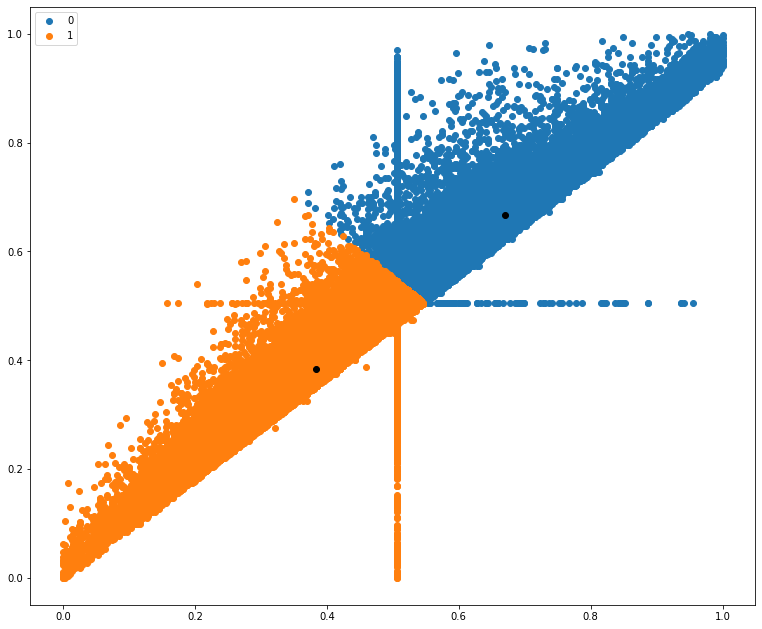

In [ ]:
u_label = np.unique(label)
plt.figure(figsize=(13,11))
for i in u_label:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.scatter(final_centroid[i, 0], final_centroid[i, 1], c='black')
plt.legend()
plt.show()

# Evaluasi

Menggunakan Elbow Method untuk menentukan nilai K pada K-Means

In [ ]:
def sse(df, centroid, label):
  sse_res = 0
  u_label = np.unique(label)
  for i in u_label:
    distance = (df[label == i, 0] - final_centroid[i,0])**2 + (df[label == i, 1] - final_centroid[i,1])**2
    temp = distance.sum()
    sse_res += temp

  return sse_res

Percobaan Evaluasi untuk 8 nilai K berbeda (K = 1 sampai 8) pada data salju

Implementasi Elbow Method

In [ ]:
#Perhitungan SSE untuk setiap nilai K
k = list(range(1,8+1))
eval = []
for i in k:
  label, final_centroid = kmeans(df, i)
  temp = sse(df, final_centroid, label)
  eval.append(temp)

Visualisasi Hasil Elbow Method

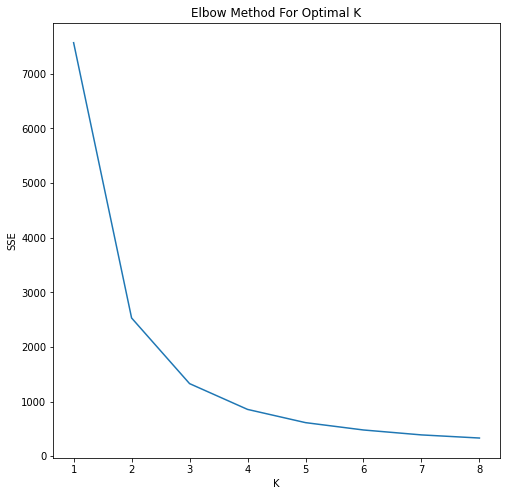

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(k, eval)
plt.xticks(k)
plt.title('Elbow Method For Optimal K')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()